In [1]:
# Install dependencies
!pip install stable-baselines3 gymnasium --quiet

In [2]:
# Import libraries
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy


In [3]:
# Create environment
env = gym.make('CartPole-v1')

In [35]:
# Create the model
model = PPO('MlpPolicy', env, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [36]:
# Train the model
model.learn(total_timesteps=100)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.9     |
|    ep_rew_mean     | 21.9     |
| time/              |          |
|    fps             | 736      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------


In [37]:
# Evaluate the model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Mean reward: {mean_reward} +/- {std_reward}")

Mean reward: 169.6 +/- 23.01825362619849


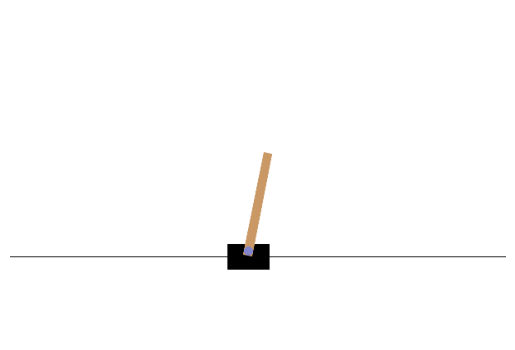

Saved: gifs/PPO_cartpole_100_steps.gif


In [39]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import imageio
import time
import os

# Create a folder if you want
os.makedirs("gifs", exist_ok=True)

# Ensure the creation of env
env = gym.make("CartPole-v1", render_mode="rgb_array")

# Reset env and prepare
obs, _ = env.reset()
frames = []

# Simulate agent
for _ in range(200):
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, _ = env.step(action)

    # get rgb frame
    frame = env.render()
    frames.append(frame)

    # Show inline in notebook
    clear_output(wait=True)
    plt.imshow(frame)
    plt.axis("off")
    display(plt.gcf())
    plt.close()
    time.sleep(0.02)

    if terminated or truncated:
        obs, _ = env.reset()

env.close()

# Save as gif
gif_name = f"gifs/PPO_cartpole_{100}_steps.gif"
imageio.mimsave(gif_name, frames, fps=30)
print(f"Saved: {gif_name}")
